<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 Import Modules necessary for running this notebook 
</p>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 Import function file necessary for running this notebook 
</p>

In [2]:
import fun_CondProb as fn

<span style="font-family: 'Times New Roman'; font-size: 32px; color: red;"> List available FACTS Data:: <br> </span>
<span style="font-size: 22px; color: green;"> :: FACTS 1.0 run</span> 
    

In [3]:
ssp='ssp585'
path = f'/projects/kopp/facts-experiments/221217/coupling.{ssp}/output/'
files=fn.list_files_with_names(path, ["global", "AIS"])
#
df = pd.DataFrame(files, columns=['File Name']).reset_index().rename(columns={'index': 'Index'})
# print(df.to_string(index=False))

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<p style="font-size: 32px; color: green;">&#10145; Choose <span style="color: blue;">AIS</span> data file.</p>

In [4]:
#
start_year=2020; end_year=2100; unit='cm'; station=0


# AIS from Emulator module.
AIS_emu_path=f'{path}/coupling.ssp585.emuAIS.emulandice.AIS_globalsl.nc'
var = 'emu'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from Larmip module.
AIS_lar_path=f'{path}/coupling.ssp585.larmip.larmip.AIS_globalsl.nc'
var = 'lar'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")


# AIS from the IPCC AR5 module.
AIS_ar5_path=f'{path}/coupling.ssp585.ar5AIS.ipccar5.icesheets_AIS_globalsl.nc'
var = 'ar5'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from the IPCC Deconto_21 module.
AIS_d21_path=f'{path}/coupling.ssp585.deconto21.deconto21.AIS_AIS_globalsl.nc'
var = 'd21'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from the Bamber 19 module.
AIS_b19_path=f'{path}/coupling.ssp585.bamber19.bamber19.icesheets_AIS_globalsl.nc'
var = 'b19'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    Select Plot data.
</span>
<br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: Extract all samples from a particulay year 
</span>

In [5]:
def get_axis_data(dum_slc, dum_time, *specific_year):
    return [dum_slc[:, dum_time == t].squeeze() for t in specific_year]

In [6]:
T1=2030; T2=2050; T3=2070; T4=2100

var = 'lar'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")
var = 'ar5'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")
var = 'd21'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")
var = 'b19'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")

<hr style="border: none; height: 4px; background-color: yellow; border-style: dotted;">

<p>Approach — </p>
<ol>
    <li> use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html">sklearn.neighbors.KernelDensity</a> to fit a 2-d kernel density estimate to the pairs of, for example, (2030, 2100) output; </li>
    <li>create a grid of test points</li>
    <li>use the score_samples method of the kernel density estimate to determine a weight for each test point</li>
    <li>normalize the weights vertically</li>
    <li>do a filled contour plot as in Dan’s code <br>
        <span style="color: red; font-style: italic;"> Kernel density scores are log likelihoods. Convert to likelihoods before normalizing then convert back before plotting </span></li> 
</ol>        

<p>Links — </p>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html">sklearn.neighbors.KernelDensity</a>
<br>
<a href="https://scikit-learn.org/stable/modules/density.html#kernel-density-estimation"> kernel-density-estimation</a>

In [7]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

VAR1='lar'; T1=2030; T2=2100;
K='gaussian'; BW=1
linspace_int=100
# val = 'density'
# val = 'log_density'
val = 'Norm_log_density'

# Input
xax_VAR=f'{VAR1}_{T1}'
yax_VAR=f'{VAR1}_{T2}'
INdata = np.column_stack((eval(xax_VAR), eval(yax_VAR)))

# KDE
kde = KernelDensity(kernel=K, bandwidth=BW).fit(INdata)

# Create grid
# xgrid = np.linspace(INdata[:,0].min(), INdata[:,0].max(), linspace_int)
xgrid = np.linspace(INdata[:,0].min()-1, INdata[:,0].max()+1, linspace_int)
# xgrid = np.linspace(-3, 3, linspace_int)

# ygrid = np.linspace(INdata[:,1].min(), INdata[:,1].max(), linspace_int)  
ygrid = np.linspace(INdata[:,1].min()-1, INdata[:,1].max()+1, linspace_int)  
# ygrid = np.linspace(-20, 20, linspace_int)  

X, Y  = np.meshgrid(xgrid, ygrid)
grid_samples = np.vstack([X.ravel(), Y.ravel()]).T  

# Eval density model on the grid (log likelihoods)
log_density_values = kde.score_samples(grid_samples)

# ...........................................................................................
if val == 'log_density':
    RHO=log_density_values.reshape(X.shape)

elif val == 'density':
    density_values = np.exp(log_density_values).reshape(X.shape)
    RHO=density_values

elif val == 'Norm_log_density':
    # Convert to likelihoods for normalization
    density_values = np.exp(log_density_values).reshape(X.shape)
    Norm_density_values = density_values/density_values.sum(axis=0)
    # Convert back
    Norm_log_density_values = np.log(Norm_density_values)
    #
#     RHO=Norm_log_density_values
    RHO=Norm_density_values
# ...........................................................................................

<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: Check if the column sums to 1 
</span>

In [8]:
# density_values = np.exp(log_density_values)
dum_density_values = np.exp(log_density_values).reshape(X.shape)
# density_values.shape
dum_density_values /= dum_density_values.sum(axis=0)
#
dum_density_values[:,75].sum()

0.9999999999999998

<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: visualize  
</span>

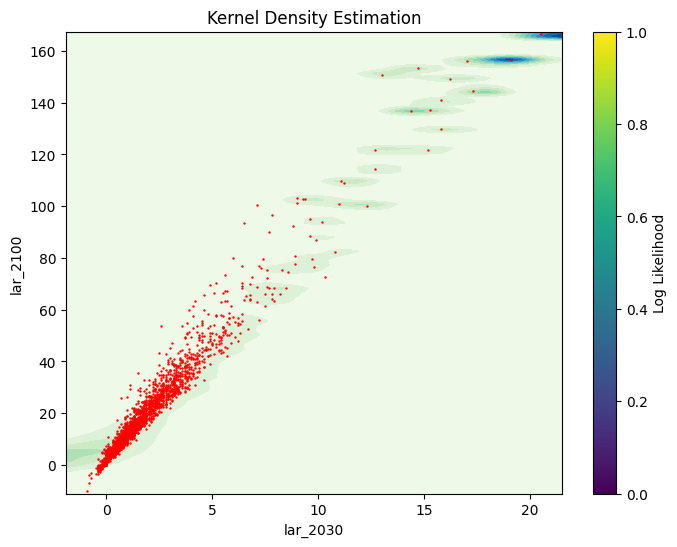

In [9]:
# visualize 1
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, RHO, levels=10, cmap='GnBu')
plt.scatter(INdata[:, 0], INdata[:, 1], s=.5, facecolor='red')
plt.title('Kernel Density Estimation')
plt.xlabel(xax_VAR)
plt.ylabel(yax_VAR)
# plt.xlim(-3, 3)
plt.colorbar(label='Log Likelihood')
plt.show()
    

<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: visualize   LOG
</span>

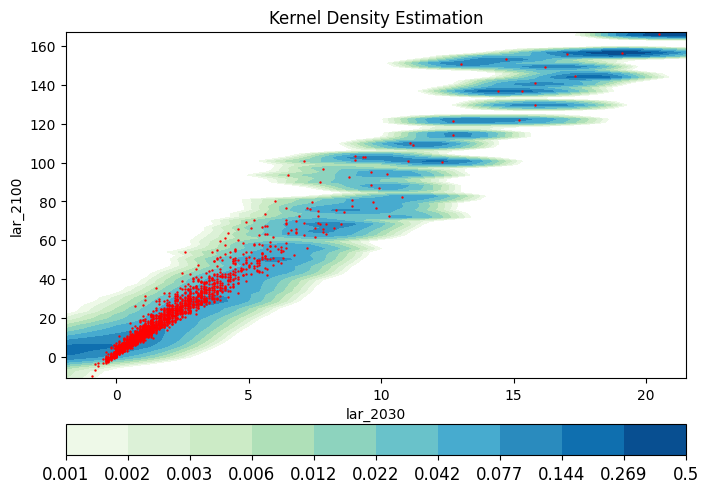

In [10]:
# visualize 2
plt.figure(figsize=(8, 6))
plt.set_cmap('GnBu')
#
clevels=np.linspace(np.log(1e-3),np.log(0.5),11)
clabels=np.round(np.exp(clevels),decimals=3).astype('str')

c1=plt.contourf(X, Y, np.log(RHO),clevels)
cbar=plt.colorbar(c1,ticks=clevels,orientation='horizontal',pad=0.1)
cbar.set_ticklabels(clabels)
cbar.ax.tick_params(labelsize=12)
#
plt.scatter(INdata[:, 0], INdata[:, 1], s=.5, facecolor='red')
#
#
plt.title('Kernel Density Estimation')
plt.xlabel(xax_VAR)
plt.ylabel(yax_VAR)
# plt.xlim(-3, 3)
# plt.ylim(-20, 40)
# plt.colorbar(label='Log Likelihood')
plt.show()

<hr style="border: none; height: 4px; background-color: red; border-style: dotted;">